# Do SGD from scratch

> Plan of Action:
    1. Create Data that has a given relationship
    2. Make the SGD loop
            a. Get epoch count
            b. Get learning rate
            c. Get Batch Size
            d. Initialize the weight values
            e. Loop over datapoints 
            f. Update the grad value using the derivative for MSE
            g. Subtract the grad value from the old weight matrix
    3. Compare the error at the end of each epoch
    4. Plot the plot for the new and the old weights

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries Loaded!")

Libraries Loaded!


## 1. Making the Data
> * For making the data, I am taking random elements from a normal distribution, since this is a toy dataset and will anyways have to standardize the dataset so choosing a standard distribution will save us from doing that.
* The Dataset will have 1500 rows and 5 columns

In [66]:
# making the data
from numpy import random
data = [] # for storing the data
# using 500 datapoints
for i in range(5):
    # appending the series to the list
    data.append(random.normal(size = 1500))
# turning the  data into a dataframe
data = pd.DataFrame(np.array(data).T)
data.columns = ['c1', 'c2', 'c3', 'c4', 'c5']
print(data.shape)
data.head()

(1500, 5)


,c1,c2,c3,c4,c5
0,-0.691176,1.879309,2.032961,0.435402,1.140712
1,0.386616,-0.815514,-1.133657,1.873337,1.271787
2,0.564098,0.741000,0.334156,1.307906,-0.220695
3,2.283888,-0.917237,-0.072737,-0.364898,0.100789
4,-0.865422,0.074700,0.641784,0.658905,-0.212799


In [356]:
# making a list of the actual weights
act_w = [0.03, 0.05, -0.07, -0.046,  0.023]

# making the y-values using the weight and adding some noise to random datapoints
y = np.zeros(1500)
for i,w in enumerate(act_w, start = 1):
    y += w*data['c'+str(i)]
print(y)

0      -0.062869
1      -0.006744
2      -0.034658
3       0.046850
4      -0.102357
          ...   
1495    0.138875
1496    0.033848
1497    0.085981
1498    0.069417
1499    0.103078
Name: c1, Length: 1500, dtype: float64


In [357]:
# now we will add small amounts of noise to the labels
indices = random.randint(0,1500, 450)
noise = random.uniform(low = -0.0025, high = 0.0025, size = 450)
# y_act = y+noise # the actual y_label
print(y)
indices

0      -0.062869
1      -0.006744
2      -0.034658
3       0.046850
4      -0.102357
          ...   
1495    0.138875
1496    0.033848
1497    0.085981
1498    0.069417
1499    0.103078
Name: c1, Length: 1500, dtype: float64


array([ 518,   61,  382,   11, 1257, 1424, 1236,  935,  247, 1224,  548,
        285, 1213, 1442,  545,   94,  322,  628,  250,  152,  326,  239,
        995,  566,  234,  244,  304,  783,  458,  541,  398,  566,  185,
       1327, 1215,  264,  823, 1241,  609, 1020,  322, 1425, 1396, 1161,
       1418, 1367,  644, 1433,  514,  122,  551,  601,  196, 1228, 1412,
        928, 1469, 1333,  648, 1220, 1437, 1339,  770, 1491, 1328, 1466,
       1149, 1044,  654,  944, 1136,  953,  403,  919,  699,  949,  658,
       1331,  589,  353,  817, 1053,   81,  524,  992,  828,  566, 1212,
        508,  340, 1150,  181,  321,   64,   99,  140,  739,  820,  432,
        531,  843,  885, 1308,  293,  558, 1423, 1370, 1088,  886,  806,
       1139, 1123, 1165,  455,  229,  238,  958,  681,  860,   84, 1188,
        248,  353, 1464,  560,  961, 1113,  545,  961, 1299,  341, 1485,
        513,  941,  239,  170,  399,  405,  117,   83,  617, 1207,  318,
       1449,  145,   86, 1172,  824,  258, 1010,  1

In [358]:
for i in indices:
    y[i] += random.choice([-0.00012, 0.00023, 0.000012, 0.0000431, 0.00045])
    
print(y)

-0.0789406966835437
0      -0.062869
1      -0.006744
2      -0.034778
3       0.046850
4      -0.102357
          ...   
1495    0.138875
1496    0.033848
1497    0.085981
1498    0.069417
1499    0.103078
Name: c1, Length: 1500, dtype: float64


## 2. Applying SGD

Plan of Action:

1. Create Data that has a given relationship
2. Make the SGD loop
        a. Get epoch count
        b. Get learning rate
        c. Get Batch Size
        d. Initialize the weight values
        e. Loop over datapoints 
        f. Update the grad value using the derivative for MSE
        g. Subtract the grad value from the old weight matrix
3. Compare the error at the end of each epoch
4. Plot the plot for the new and the old weights

In [542]:
# declaring the parameters
epochs = 1500
learning_rate = 0.01
batch_size = 128


In [561]:
from tqdm import tqdm_notebook
from sklearn.metrics import mean_squared_error
# implementing SGD

def fit(df):
    """
        Function to do SGD and return the weights
    """
    curr_e = 1
    # initializing the weights
    # we will randomly initialize the weights
    w_pred = np.zeros(5)
    while(curr_e <= epochs): # main loop
        print(f"Epoch:{curr_e}")
        # making the samples
        samp = df.sample(n = batch_size, replace = True, axis = 0)
        samp_indices = list(samp.index) # getting the indices of each sample
        for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column
            grad = 0
            # nw = ow - lr*grad of cost wrt ow
            # calculating the grad
            grad += row*(y[i]-np.dot(w_pred,row))*(-2/batch_size)
            
        # updataing the weight
        w_pred = w_pred - (learning_rate*grad)
        print("Weights Updated")
        
        # predicting with the weights to calculate mse per epoch
        y_pred = predict(samp, w_pred)
        # calculating the mse
        mse = mean_squared_error(y[samp_indices], y_pred) 
        print(f"MSE: {mse}")
        # updation
        curr_e += 1
    return w_pred
        
def predict(x, w):
    """
        Function to predict the values
    """
    y_ret = []
    for i,row in x.iterrows():
        y_ret.append(np.dot(w, row))
    return y_ret

In [562]:
w_preds = fit(data)

Epoch:1


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011064554748240172
Epoch:2


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010603295720630214
Epoch:3


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011097706792870664
Epoch:4


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010052488860139505
Epoch:5


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009706051187235294
Epoch:6


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009704143527117157
Epoch:7


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011050836836944545
Epoch:8


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009869640549082181
Epoch:9


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.013598369294827245
Epoch:10


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011100884704300354
Epoch:11


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011231500481960336
Epoch:12


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009353986561775348
Epoch:13


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007741505517837702
Epoch:14


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009502282660649477
Epoch:15


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011239855205749782
Epoch:16


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011746241593837142
Epoch:17


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009331049295490987
Epoch:18


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00905907473087281
Epoch:19


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00871368597756421
Epoch:20


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008560312844702832
Epoch:21


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010489387997821795
Epoch:22


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010357739684385605
Epoch:23


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011853920023569539
Epoch:24


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010886614807261018
Epoch:25


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.012873824468222418
Epoch:26


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011547811084637979
Epoch:27


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011250238666659204
Epoch:28


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011317093227129284
Epoch:29


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010803686110067545
Epoch:30


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.012014844686947006
Epoch:31


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011093949785355352
Epoch:32


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011797085211442085
Epoch:33


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011282301606725042
Epoch:34


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.012041142238812754
Epoch:35


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010574837863200643
Epoch:36


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009684349755291474
Epoch:37


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01072772888198376
Epoch:38


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010511539786182363
Epoch:39


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010467151032355265
Epoch:40


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00984894954446102
Epoch:41


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011759574466069173
Epoch:42


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011685086123090584
Epoch:43


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009882918326858909
Epoch:44


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008769615741676211
Epoch:45


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00988863350650726
Epoch:46


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010487771259942453
Epoch:47


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010954676503440949
Epoch:48


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010051405854852324
Epoch:49


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010336925589981331
Epoch:50


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006847074036703774
Epoch:51


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011005954116959038
Epoch:52


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01031510299976289
Epoch:53


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010961262534928289
Epoch:54


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011096125372798776
Epoch:55


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01069757824506289
Epoch:56


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.013094352030217228
Epoch:57


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009908161161044312
Epoch:58


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010581721224700462
Epoch:59


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010291646759823091
Epoch:60


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01077253076548518
Epoch:61


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009442349887025893
Epoch:62


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010191981424006987
Epoch:63


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011657732964331056
Epoch:64


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009484875941701358
Epoch:65


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009265138077272781
Epoch:66


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011164526467881093
Epoch:67


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009234436534610532
Epoch:68


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011190147290733766
Epoch:69


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01041977204889745
Epoch:70


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.012025059453773001
Epoch:71


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010108838264272845
Epoch:72


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010624084744498611
Epoch:73


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011244460195065552
Epoch:74


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008418986168662978
Epoch:75


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009313770933664815
Epoch:76


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009464320901324052
Epoch:77


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009236163320638462
Epoch:78


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011068496558955962
Epoch:79


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01154362935097503
Epoch:80


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01018903892337909
Epoch:81


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009072782472047146
Epoch:82


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008180794894521858
Epoch:83


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00770153376973492
Epoch:84


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011988023761812754
Epoch:85


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.012038792737328202
Epoch:86


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009879640072589235
Epoch:87


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01074565453737436
Epoch:88


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.013365951885496004
Epoch:89


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010495578944468769
Epoch:90


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.012099100520498337
Epoch:91


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01004222529802303
Epoch:92


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.012760343032013694
Epoch:93


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01053074862084209
Epoch:94


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009084306395485069
Epoch:95


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009900071428599335
Epoch:96


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01005994412171099
Epoch:97


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0104174639490896
Epoch:98


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011320920905731932
Epoch:99


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01025572993199058
Epoch:100


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008958587628639129
Epoch:101


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010133739133691986
Epoch:102


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011670779488186749
Epoch:103


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009628244644466908
Epoch:104


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0077951592675057305
Epoch:105


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0077164682235724025
Epoch:106


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009622753696005081
Epoch:107


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009651619395206642
Epoch:108


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008866744606743743
Epoch:109


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010673266544201664
Epoch:110


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007919354770473175
Epoch:111


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009637481677764428
Epoch:112


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01079948168612875
Epoch:113


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009583091904264578
Epoch:114


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009011702869636578
Epoch:115


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01053811514160549
Epoch:116


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column


MSE: 0.009549664765854554
Epoch:117



Weights Updated
MSE: 0.008881566897158672
Epoch:118


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009251705520488696
Epoch:119


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01248222833866344
Epoch:120


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010026368718250633
Epoch:121


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00953561297059553
Epoch:122


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009316787514883497
Epoch:123


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008862896541593404
Epoch:124


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010291928641355641
Epoch:125


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01181145421463627
Epoch:126


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00966485718750017
Epoch:127


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009405045291654063
Epoch:128


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009988685064902164
Epoch:129


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008605572587240644
Epoch:130


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010313706823006913
Epoch:131


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.012847160929289489
Epoch:132


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006573754560828978
Epoch:133


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010771916930226631
Epoch:134


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010946614005764825
Epoch:135


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009419263207021153
Epoch:136


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008295927151207253
Epoch:137


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009499973581237867
Epoch:138


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011313400943593985
Epoch:139


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011191317623861625
Epoch:140


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009868551635916278
Epoch:141


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0075539358621816936
Epoch:142


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010042966306927277
Epoch:143


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00731128692788529
Epoch:144


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009121901170090676
Epoch:145


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008796500345574854
Epoch:146


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011509004703322827
Epoch:147


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009707214172447031
Epoch:148


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010066227941743588
Epoch:149


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column


Weights Updated
MSE: 0.00828931715436149
Epoch:150



Weights Updated
MSE: 0.008834699005269593
Epoch:151


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011238399327029195
Epoch:152


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00991472023625319
Epoch:153


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008622159420004048
Epoch:154


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01037520502646348
Epoch:155


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01102423206326834
Epoch:156


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00945454464173375
Epoch:157


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008466336542221623
Epoch:158


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011825741844003177
Epoch:159


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00804155970900606
Epoch:160


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009100954280359466
Epoch:161


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011953489947008171
Epoch:162


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009801547058885496
Epoch:163


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010295954897595244
Epoch:164


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0102606443135815
Epoch:165



Weights Updated
MSE: 0.011308213419382266
Epoch:166


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00981697046784909
Epoch:167


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010234263074776553
Epoch:168


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01171788423602972
Epoch:169


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010853107376228788
Epoch:170


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007904591180757389
Epoch:171


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010363619460941161
Epoch:172


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011034860468410467
Epoch:173


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010165988233871322
Epoch:174


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008628336813206888
Epoch:175


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010366706776938052
Epoch:176


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008052734051884778
Epoch:177


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01090027071072007
Epoch:178


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011771984070064459
Epoch:179


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008812468018166753
Epoch:180


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011743730277509842
Epoch:181


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009458440485482496
Epoch:182


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009374705784936087
Epoch:183


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008812338239545883
Epoch:184


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008527431590004787
Epoch:185


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008865265861863009
Epoch:186


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009432840168129833
Epoch:187


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009151657415526366
Epoch:188


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01182888416912177
Epoch:189


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010608260725019521
Epoch:190


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009687454536659208
Epoch:191


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010215024852676854
Epoch:192


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011079136916571648
Epoch:193


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00908404635971556
Epoch:194


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007717882430545749
Epoch:195


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008865435308873008
Epoch:196


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009528665552790593
Epoch:197


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010128448454164305
Epoch:198


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010623873406670158
Epoch:199


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011228304579960031
Epoch:200


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010395068749623492
Epoch:201


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007934395470664261
Epoch:202


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009240581901216422
Epoch:203


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010533699217665837
Epoch:204


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00932092968088654
Epoch:205


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008829013970928598
Epoch:206


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010568905688576127
Epoch:207


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01086131454513295
Epoch:208


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006765789264656723
Epoch:209


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009775491503523685
Epoch:210


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010241425011635486
Epoch:211


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009794943598070253
Epoch:212


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009223697247482433
Epoch:213


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009238094373081217
Epoch:214


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008581515069425814
Epoch:215


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.012126044853906805
Epoch:216


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01149017150912738
Epoch:217


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009117929398729118
Epoch:218


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01058572964532441
Epoch:219


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010416208235939282
Epoch:220


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010447522247229491
Epoch:221


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008664806510348521
Epoch:222


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011443113250924458
Epoch:223


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00877941033302269
Epoch:224


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009025887466766804
Epoch:225


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009086336815321375
Epoch:226


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011037125094823927
Epoch:227


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010094474387971133
Epoch:228


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009864560486773592
Epoch:229


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.012533629821283964
Epoch:230


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010063653875826143
Epoch:231


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010085225756322065
Epoch:232


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01087554444435446
Epoch:233


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007637207795659614
Epoch:234


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008025400396287952
Epoch:235


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010398490270860563
Epoch:236


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.012068452568540432
Epoch:237


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007416512462383486
Epoch:238


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009628423158353135
Epoch:239


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.012470719983201498
Epoch:240


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01006316393651743
Epoch:241


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011575783293795317
Epoch:242


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008842612727759332
Epoch:243


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010289360480055194
Epoch:244


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008651152620588175
Epoch:245


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008932412410936015
Epoch:246


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010565351734786822
Epoch:247


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009488730447504638
Epoch:248


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008417843889168063
Epoch:249


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008491029536476558
Epoch:250


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010207617818115999
Epoch:251


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009336162191041457
Epoch:252


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009908655755022797
Epoch:253


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008711379376722624
Epoch:254


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0069859754004608695
Epoch:255


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010752987222649422
Epoch:256


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011597911822955862
Epoch:257


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009301693677034817
Epoch:258


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009192432115346628
Epoch:259


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00878287384121236
Epoch:260


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009286033253713799
Epoch:261


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009812663476234256
Epoch:262


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009956522804017194
Epoch:263


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008494052363235286
Epoch:264


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0074231111427946386
Epoch:265


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008006370667389788
Epoch:266


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010523336673777868
Epoch:267


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010740671974501497
Epoch:268


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00908630492748553
Epoch:269


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008561606043280953
Epoch:270


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011909740946518026
Epoch:271


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008773383324978744
Epoch:272


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007355554737646132
Epoch:273


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0077895007408904995
Epoch:274


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009325506334334918
Epoch:275


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008240921572382374
Epoch:276


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009693845039094304
Epoch:277


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009288690593080802
Epoch:278


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009499212501433367
Epoch:279


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008428777119282268
Epoch:280


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010249804682088394
Epoch:281


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010153015364299849
Epoch:282


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00993168946317087
Epoch:283


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.012205147845666946
Epoch:284


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010833953026863965
Epoch:285


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008114912773013943
Epoch:286


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010096021979044443
Epoch:287


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0102462528599695
Epoch:288


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007816904944175636
Epoch:289


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008187650942584224
Epoch:290


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010118615682169447
Epoch:291


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01069522828924312
Epoch:292


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01023263276706443
Epoch:293


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00961174347908394
Epoch:294


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009388759738843601
Epoch:295


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008005576713129663
Epoch:296


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007312790940821166
Epoch:297


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010074584037241336
Epoch:298


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009564555442125068
Epoch:299


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010186144567987226
Epoch:300


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01122838266344862
Epoch:301


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008750624503511027
Epoch:302


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008371538876008583
Epoch:303


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009299497720972886
Epoch:304


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009341050781146732
Epoch:305


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010305440941168984
Epoch:306


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008826509396346794
Epoch:307


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009097432630348127
Epoch:308


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011352452192065543
Epoch:309


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008491222910961542
Epoch:310


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008584568182676515
Epoch:311


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007596217923800258
Epoch:312


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010535469510586627
Epoch:313


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009929024222073035
Epoch:314


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00848206077690162
Epoch:315


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00841620793060415
Epoch:316


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008762299868983406
Epoch:317


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010438542897655206
Epoch:318


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010978432178882423
Epoch:319


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011386027249921526
Epoch:320


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009894169174159664
Epoch:321


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008370911041562495
Epoch:322


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01234587613926193
Epoch:323


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009813397923695028
Epoch:324


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008374253286635944
Epoch:325


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011470513890365693
Epoch:326


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007459879635359055
Epoch:327


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010111813168998186
Epoch:328


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009144757503095478
Epoch:329


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009551385410657474
Epoch:330


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010112335083190881
Epoch:331


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010519492271452508
Epoch:332


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008573695480687642
Epoch:333


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00817558755254944
Epoch:334


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00838070307268702
Epoch:335


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009206884029936793
Epoch:336


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00966694012889138
Epoch:337


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00896255121024899
Epoch:338


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009712475058098427
Epoch:339


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011181520972960154
Epoch:340


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010399746934980674
Epoch:341


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00933261547405087
Epoch:342


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010162471838491003
Epoch:343


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011935438234239612
Epoch:344


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008913548276053748
Epoch:345


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009845725674771865
Epoch:346


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00833209500435608
Epoch:347


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009557906428169779
Epoch:348


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009383277650347657
Epoch:349


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006670438108175157
Epoch:350


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007039107143499891
Epoch:351


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010735646194511832
Epoch:352


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010151632178893758
Epoch:353


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009952580403457895
Epoch:354


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009744733805926713
Epoch:355


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007979289868771422
Epoch:356


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006729712861260403
Epoch:357


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008322743102208239
Epoch:358


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008793448164336509
Epoch:359


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007914981562313433
Epoch:360


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009310455302546473
Epoch:361


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005717439674091107
Epoch:362


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011675327784505155
Epoch:363


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010075632725484408
Epoch:364


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00866890402051199
Epoch:365


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009805592418850491
Epoch:366


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009948295934477162
Epoch:367


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010673717792545851
Epoch:368


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010932853389876056
Epoch:369


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007426394535456371
Epoch:370


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009116944898433357
Epoch:371


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010105646042738673
Epoch:372


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007943455009377822
Epoch:373


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009574425617421063
Epoch:374


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008757721218657743
Epoch:375


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008237225019079544
Epoch:376


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009247861466101116
Epoch:377


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008663314557420186
Epoch:378


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010016569977980911
Epoch:379


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009413361793170393
Epoch:380


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008629209974045246
Epoch:381


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008455930867716292
Epoch:382


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00853355698940916
Epoch:383


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009657917926423301
Epoch:384


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009955113898015722
Epoch:385


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00910247224246669
Epoch:386


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010549349340601834
Epoch:387


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010070750535277277
Epoch:388


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01286529700423062
Epoch:389


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007478127041662866
Epoch:390


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011395487366745914
Epoch:391


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010629252855056356
Epoch:392


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011762574219853418
Epoch:393


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009633371475148747
Epoch:394


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008857251712300812
Epoch:395


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009823081342216534
Epoch:396


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008494189153384861
Epoch:397


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009459436930932132
Epoch:398


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009024444725745859
Epoch:399


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0077878286193087615
Epoch:400


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009442160025547635
Epoch:401


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007720383387498
Epoch:402


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00950449130477916
Epoch:403


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00794673140068827
Epoch:404


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008864261664340175
Epoch:405


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00965502338421774
Epoch:406


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0068098750909855905
Epoch:407


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009543700752059948
Epoch:408


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008112525192787566
Epoch:409


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0101720216036502
Epoch:410


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00935531254254851
Epoch:411


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009387883886507261
Epoch:412


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009013806447683115
Epoch:413


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011530446070595723
Epoch:414


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008348385084892534
Epoch:415


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009842618008771132
Epoch:416


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010714147915734752
Epoch:417


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009765843388768066
Epoch:418


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007787080731868481
Epoch:419


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010915222871112993
Epoch:420


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008973391867274673
Epoch:421


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009047977764008508
Epoch:422


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009338450327013113
Epoch:423


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011152863700963196
Epoch:424


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00935248508660315
Epoch:425


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00886411293357552
Epoch:426


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008596511073055702
Epoch:427


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010325464075226179
Epoch:428


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008717145890341801
Epoch:429


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011078995602363056
Epoch:430


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007266320291046967
Epoch:431


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009628881140979716
Epoch:432


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00852161765376158
Epoch:433


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008752670753387124
Epoch:434


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01019447405256237
Epoch:435


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00932460222288152
Epoch:436


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008876895047241807
Epoch:437


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010088381831480753
Epoch:438


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01259663079715765
Epoch:439


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008152902974548553
Epoch:440


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008721541541668695
Epoch:441


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009605827039669435
Epoch:442


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00893851856346858
Epoch:443


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007984489855536184
Epoch:444


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009076811039378425
Epoch:445


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01084951873230562
Epoch:446


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009651757089304484
Epoch:447


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009656599189932506
Epoch:448


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010441776982157515
Epoch:449


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00693994174998812
Epoch:450


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011294075841934068
Epoch:451


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008788415539189402
Epoch:452


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0074848577157969
Epoch:453


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008340449874254632
Epoch:454


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01209323664979011
Epoch:455


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009122230269612376
Epoch:456


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007969405387942921
Epoch:457


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00970614951841632
Epoch:458


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005759378097248423
Epoch:459


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008861880406676192
Epoch:460


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008694714341873518
Epoch:461


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010441856640608527
Epoch:462


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009803274745319142
Epoch:463


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008470964110513844
Epoch:464


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00941568354074541
Epoch:465


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009836445394065429
Epoch:466


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008653694247535072
Epoch:467


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008709778318153557
Epoch:468


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007747597564453469
Epoch:469


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008613179888956277
Epoch:470


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009378332230263466
Epoch:471


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00986384355212927
Epoch:472


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009009102196574451
Epoch:473


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00945477569272583
Epoch:474


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00920798476457574
Epoch:475


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010818546198379304
Epoch:476


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0089921607826026
Epoch:477


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010568974661421546
Epoch:478


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007198977433235944
Epoch:479


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011107381287009357
Epoch:480


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00904562113085124
Epoch:481


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009206207103510625
Epoch:482


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010211484263396589
Epoch:483


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009449433901646312
Epoch:484


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009012087241527734
Epoch:485


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010086232109434282
Epoch:486


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010594160156202528
Epoch:487


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008469513534982015
Epoch:488


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008162390296054256
Epoch:489


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007944352130506682
Epoch:490


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008886067148918245
Epoch:491



Weights Updated
MSE: 0.009779654605527932
Epoch:492


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010542094241227519
Epoch:493


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009710638644136418
Epoch:494


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009125546698299914
Epoch:495


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008670483829826256
Epoch:496


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00847154845670296
Epoch:497


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008670908511275357
Epoch:498


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009222597827172909
Epoch:499


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008252453025770577
Epoch:500


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008992687532210636
Epoch:501


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010207316958678377
Epoch:502


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00798537804168196
Epoch:503


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009089056001216587
Epoch:504


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007430916694181486
Epoch:505


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009023266968578341
Epoch:506


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010277977256502598
Epoch:507


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007579269971833215
Epoch:508


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009808689538662695
Epoch:509


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00846477928092634
Epoch:510


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009673954822989338
Epoch:511


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007877966145265453
Epoch:512


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0063618667088800596
Epoch:513


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008847887345104982
Epoch:514


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00941127044445915
Epoch:515


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009650436908660607
Epoch:516


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008792428676622421
Epoch:517


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009975000691895927
Epoch:518


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00783697007990964
Epoch:519


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007718958698494222
Epoch:520


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009682463705169484
Epoch:521


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010242136605697007
Epoch:522


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009135705822873753
Epoch:523


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010101826117734341
Epoch:524


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007546712699817562
Epoch:525


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007645317115566586
Epoch:526


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009754967373545071
Epoch:527


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010846673859342262
Epoch:528


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009920887059860516
Epoch:529


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010744533622414693
Epoch:530


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007082110149857396
Epoch:531


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008742573774613347
Epoch:532


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00766402776023516
Epoch:533


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008906960124711077
Epoch:534


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009999445587502181
Epoch:535


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009324747583005184
Epoch:536


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00957501760281981
Epoch:537


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00887444908151419
Epoch:538


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011527338811231604
Epoch:539


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00897534135730999
Epoch:540


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009088368009450625
Epoch:541


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009382620629238454
Epoch:542


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009539995348704214
Epoch:543


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008183507293882099
Epoch:544


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007171300915092075
Epoch:545


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009150035266579183
Epoch:546


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010635498552862792
Epoch:547


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008326139030173327
Epoch:548


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009244356095220108
Epoch:549


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007248841720169982
Epoch:550


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008266987603360913
Epoch:551


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008631485258970768
Epoch:552


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008408008582510507
Epoch:553


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009376131695772874
Epoch:554


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008229400914908492
Epoch:555


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008511117914070233
Epoch:556


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009153745870274451
Epoch:557


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010845933462457784
Epoch:558


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008256033050288249
Epoch:559


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009390154250664834
Epoch:560


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010114757479607238
Epoch:561


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008801018103715141
Epoch:562


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011015646902407486
Epoch:563


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008690006980924854
Epoch:564


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00843530554745485
Epoch:565


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009285313039049243
Epoch:566


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008571338814251529
Epoch:567


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008117124951749464
Epoch:568


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010362558197177811
Epoch:569


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00968149579956783
Epoch:570


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007641584432163033
Epoch:571


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008498259372518326
Epoch:572


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009215540585510766
Epoch:573


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008967661166332913
Epoch:574



Weights Updated
MSE: 0.006475257997770349
Epoch:575


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008881066591470772
Epoch:576


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007983967736146071
Epoch:577


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008983543083620095
Epoch:578


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008658769135363845
Epoch:579


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009075767967990556
Epoch:580


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007238099788486204
Epoch:581


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007589798137190473
Epoch:582


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009729079809160272
Epoch:583


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008026989924004366
Epoch:584


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008085080009924518
Epoch:585


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009208619071613976
Epoch:586


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009343635442071807
Epoch:587


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007288665074136591
Epoch:588


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008796502955012034
Epoch:589


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009493397776994811
Epoch:590


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009605634858594399
Epoch:591


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00887053672830741
Epoch:592


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008824883735982182
Epoch:593


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00885649022815148
Epoch:594


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010687212130749277
Epoch:595


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008103968415939088
Epoch:596


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00899893367797015
Epoch:597


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008870067269110748
Epoch:598


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010478791159921702
Epoch:599


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01077629500838628
Epoch:600


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010271649304877185
Epoch:601


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009198782385977156
Epoch:602


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009531206878015753
Epoch:603


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007755257167239624
Epoch:604


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009987936522366275
Epoch:605


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008581303124461464
Epoch:606


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007828118670237917
Epoch:607


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009367426606911707
Epoch:608


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008892467788153169
Epoch:609


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008832374877436069
Epoch:610


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00674413794865158
Epoch:611


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009717227110331293
Epoch:612


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006997678262142543
Epoch:613


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007930932593074206
Epoch:614


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009316681533509286
Epoch:615


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006922434835202988
Epoch:616


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008075335514317987
Epoch:617


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009951860402578169
Epoch:618


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00771425106352332
Epoch:619


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010555079405440381
Epoch:620


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010201742120160518
Epoch:621


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008094755289391752
Epoch:622


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00793414810961609
Epoch:623


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007053695994449839
Epoch:624


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011042223333837576
Epoch:625


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008391234534809056
Epoch:626


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008751606863449687
Epoch:627


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008800915579371063
Epoch:628


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00885928626644679
Epoch:629


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009448716302901831
Epoch:630


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009205532462528991
Epoch:631


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009351324393033463
Epoch:632


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00870752618842019
Epoch:633


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009161145685712947
Epoch:634


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008195094630422367
Epoch:635


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008968112720383274
Epoch:636


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008661801916171306
Epoch:637


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007282597396937769
Epoch:638


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008762673055577354
Epoch:639


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008797657446536267
Epoch:640


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008061776067457694
Epoch:641


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00690421648080348
Epoch:642


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008438135159185265
Epoch:643


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00842377859764886
Epoch:644


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column


Weights Updated
MSE: 0.008495459632183535
Epoch:645



Weights Updated


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column


MSE: 0.010508649431377078
Epoch:646



Weights Updated
MSE: 0.007611882337034935
Epoch:647


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010717300916404673
Epoch:648


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009920495165742099
Epoch:649


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006872775473195357
Epoch:650


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010342813407288404
Epoch:651


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0076833887244861275
Epoch:652


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007408369850066136
Epoch:653


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0072929459165467754
Epoch:654


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009176083440792685
Epoch:655


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007861599738323285
Epoch:656


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009241115717481343
Epoch:657


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007271605051490014
Epoch:658


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008704039379156377
Epoch:659


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009637454446492113
Epoch:660


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008962284106804316
Epoch:661


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008531209810687838
Epoch:662


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008844718350685543
Epoch:663


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008833336776767156
Epoch:664


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009198098764009
Epoch:665


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00848997019212811
Epoch:666


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00796495864832044
Epoch:667


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008177648815512813
Epoch:668


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008097179380173904
Epoch:669


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007998999913514248
Epoch:670


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009349853628979013
Epoch:671


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009723561866140483
Epoch:672



Weights Updated
MSE: 0.008442601987446594
Epoch:673


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008447184743533528
Epoch:674


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008759866381361477
Epoch:675


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008416028563324768
Epoch:676


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010537127400383591
Epoch:677


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008315806731274734
Epoch:678


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007701352877804343
Epoch:679


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00916857910900413
Epoch:680


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009701516217155547
Epoch:681


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.012708784666227376
Epoch:682


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008917362066516357
Epoch:683


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007797999031802967
Epoch:684


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006963614950138582
Epoch:685


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007800871070079614
Epoch:686


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008043372714672809
Epoch:687


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009545196796350117
Epoch:688


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009227060559387606
Epoch:689


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009049771570756312
Epoch:690


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00844633480541873
Epoch:691


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0069218289346394506
Epoch:692


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007896183181772341
Epoch:693


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008176393228867134
Epoch:694


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009001236639578084
Epoch:695


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007406973929219376
Epoch:696


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00875154549561702
Epoch:697


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007625905794386819
Epoch:698


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009161640776626373
Epoch:699


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009848283953330487
Epoch:700


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010153460947990892
Epoch:701


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008706428418905742
Epoch:702


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008852815448695601
Epoch:703


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007992380642293963
Epoch:704


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008524218418742464
Epoch:705


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008524570816647922
Epoch:706


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00984533154298672
Epoch:707


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007542477454140103
Epoch:708


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007799553432056555
Epoch:709


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007576335300314571
Epoch:710


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0088001524020711
Epoch:711


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008142755886999519
Epoch:712


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007729661030810792
Epoch:713


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008845364407873127
Epoch:714


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010348919264441925
Epoch:715


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008427394864109403
Epoch:716


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0071368074222154885
Epoch:717


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010599158401418125
Epoch:718


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009203967563832441
Epoch:719


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006584138502512257
Epoch:720


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008847580265194464
Epoch:721


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008736495191273442
Epoch:722


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008854216943364067
Epoch:723


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008713311720468523
Epoch:724


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007554755183415244
Epoch:725


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00786553489196429
Epoch:726


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007433718869650885
Epoch:727


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007772450338854731
Epoch:728


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009013420121741077
Epoch:729


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007724762763155529
Epoch:730


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006050894532923023
Epoch:731


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010659675363657247
Epoch:732


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009688893805175854
Epoch:733


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006877276741154103
Epoch:734


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008695589402486742
Epoch:735


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0076387513329651355
Epoch:736


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007336653213479672
Epoch:737


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00874032947568133
Epoch:738


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007808102813169012
Epoch:739


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007642968460680652
Epoch:740


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0071722625135699596
Epoch:741


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009334618778208438
Epoch:742


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008145253950292324
Epoch:743


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007489289457591586
Epoch:744


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009532790905137171
Epoch:745


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008939904853264048
Epoch:746


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008177214670938298
Epoch:747


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007682516393814558
Epoch:748


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009027636682783854
Epoch:749


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007589954273353475
Epoch:750


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007725786569737866
Epoch:751


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008774616471181685
Epoch:752


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008334292481928001
Epoch:753


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006831906283099478
Epoch:754


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008515184087926994
Epoch:755


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009584931451004067
Epoch:756


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008736075845353991
Epoch:757


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007077419373873219
Epoch:758


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01007208805315601
Epoch:759


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010558435543976924
Epoch:760


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00846054833598536
Epoch:761


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0075903552596058195
Epoch:762


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008906482422404185
Epoch:763


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00870355467189164
Epoch:764


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008161480100196666
Epoch:765


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007806837881845741
Epoch:766


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007831504236713728
Epoch:767


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0077056345385047645
Epoch:768


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008919569580100813
Epoch:769


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008142501369100802
Epoch:770


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007775615841904194
Epoch:771


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009311946057696828
Epoch:772


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008912395671433686
Epoch:773


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008967172435320933
Epoch:774


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01006683063950915
Epoch:775


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007397604787580994
Epoch:776


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007143120236572141
Epoch:777


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008287756320049036
Epoch:778


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008132282950922649
Epoch:779


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00893136596851045
Epoch:780


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008390148884690921
Epoch:781


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008945780196224037
Epoch:782


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00779617002757943
Epoch:783


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01050742357951039
Epoch:784


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007785368368205455
Epoch:785


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009144239272610035
Epoch:786


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007240965291186481
Epoch:787


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008669279057396066
Epoch:788


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007585620989342493
Epoch:789


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010326189572200703
Epoch:790


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007369251272182543
Epoch:791


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00647927299951475
Epoch:792


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009318086355718918
Epoch:793


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006884774392293627
Epoch:794


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007235338270304051
Epoch:795


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007506541230570947
Epoch:796


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00916963928131783
Epoch:797


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007461790624833955
Epoch:798


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007590416581243942
Epoch:799


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006988915867484372
Epoch:800


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007096075944269935
Epoch:801


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007554484765439006
Epoch:802


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008213267809272427
Epoch:803


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007616570581305765
Epoch:804


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008821102525414737
Epoch:805


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01008284102924096
Epoch:806


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007427104852135852
Epoch:807


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0075995360483655915
Epoch:808


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0077169776005225595
Epoch:809


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009690085311244928
Epoch:810


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007917785354168937
Epoch:811


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007197044725254388
Epoch:812


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0075862030846188516
Epoch:813


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007817152944522019
Epoch:814


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006805269823546476
Epoch:815


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007432937657387668
Epoch:816


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.01016300894733798
Epoch:817


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00700117429100632
Epoch:818


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009240387581703794
Epoch:819


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009848324926935034
Epoch:820


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007650648327141067
Epoch:821


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0073591081775037925
Epoch:822


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008429200521896149
Epoch:823


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008442196981346274
Epoch:824


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00874978226502499
Epoch:825


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00865665395213418
Epoch:826


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007987886771920945
Epoch:827


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008313917525745238
Epoch:828


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00803611156205258
Epoch:829


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006854460770381255
Epoch:830


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009037390750889787
Epoch:831


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009308286719434587
Epoch:832


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009631313673951916
Epoch:833


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007654814071828062
Epoch:834


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0063265821762498314
Epoch:835


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008756498567990795
Epoch:836


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010333304971814544
Epoch:837


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009717937094222391
Epoch:838


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007686451093901459
Epoch:839


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007394643504391607
Epoch:840


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007981974785304073
Epoch:841


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0067780274244628215
Epoch:842


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008422492529862116
Epoch:843


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006968396082022101
Epoch:844


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005952438017724458
Epoch:845


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0075279800885243425
Epoch:846


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008551531272828131
Epoch:847


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007932393008870024
Epoch:848


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008585863953519709
Epoch:849


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006767023795674678
Epoch:850


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007278307946120622
Epoch:851


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005915549631487011
Epoch:852


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007290019283230606
Epoch:853


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008575143217356205
Epoch:854


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.011129716240629882
Epoch:855


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006879710418404478
Epoch:856


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008146942976950983
Epoch:857


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007962571059145537
Epoch:858


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008968200101822511
Epoch:859


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007903400117890477
Epoch:860


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007451023996016253
Epoch:861


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006683778577848456
Epoch:862


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008316011623532515
Epoch:863


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009008806580229586
Epoch:864


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00714242547406813
Epoch:865


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005758507589154135
Epoch:866


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008050640228483936
Epoch:867


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column


Weights Updated
MSE: 0.010539593179034955
Epoch:868



Weights Updated
MSE: 0.007557483797549446
Epoch:869


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009278064425393414
Epoch:870


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007980041981370398
Epoch:871


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008092238191226654
Epoch:872


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007800138665981242
Epoch:873


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006702519316946253
Epoch:874


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009146353299533592
Epoch:875


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007875678805554006
Epoch:876


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0069175391861552235
Epoch:877


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009243478604615732
Epoch:878


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008704991931107603
Epoch:879


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0072401490311359284
Epoch:880


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008672750118136171
Epoch:881


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00574654963562694
Epoch:882


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00649024516854661
Epoch:883


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007355249603233353
Epoch:884


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009825565949056272
Epoch:885


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008637656768260086
Epoch:886


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006863775920030088
Epoch:887


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0072354186329647695
Epoch:888



Weights Updated
MSE: 0.008407314768393761
Epoch:889


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0073396472687757884
Epoch:890


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010670858428712784
Epoch:891



Weights Updated
MSE: 0.009328119426456121
Epoch:892


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007515548677697261
Epoch:893


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008432292033484445
Epoch:894


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009921005050289285
Epoch:895


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009114965543849416
Epoch:896


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006425249998859439
Epoch:897


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008451663212271377
Epoch:898


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007618472025987602
Epoch:899


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008365521911864363
Epoch:900


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009394924013927504
Epoch:901


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008603542515363263
Epoch:902


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007831394742167775
Epoch:903


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007969588864613172
Epoch:904


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005787187705285024
Epoch:905


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009047980882159726
Epoch:906


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009385578267936548
Epoch:907


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005212583165206883
Epoch:908


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008516228901821615
Epoch:909


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006543923260301653
Epoch:910


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009360547342091963
Epoch:911


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0075030467743663195
Epoch:912


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007392162163312838
Epoch:913


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010182787616095718
Epoch:914


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006453150492682715
Epoch:915


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008524607452950458
Epoch:916


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0074757509573150985
Epoch:917


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007608066513273873
Epoch:918


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006470049899216523
Epoch:919


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007501482185201352
Epoch:920


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008239372926620308
Epoch:921


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007621312903336129
Epoch:922


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00870120217746771
Epoch:923


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007206620042557893
Epoch:924


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006982207370613754
Epoch:925


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007635038043319483
Epoch:926


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008603274388511025
Epoch:927


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007503337721308725
Epoch:928



Weights Updated
MSE: 0.00917634805041161
Epoch:929


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007999635845825748
Epoch:930


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008798009997584254
Epoch:931


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007263940059384558
Epoch:932


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007435464414103401
Epoch:933


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00790874810071528
Epoch:934


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008686532846858525
Epoch:935


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007390215317043391
Epoch:936


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007116714807426737
Epoch:937


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00729155676073207
Epoch:938


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007263085385978989
Epoch:939


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007574064244578861
Epoch:940


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008057753416525286
Epoch:941


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008532401073073527
Epoch:942


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00695954965308542
Epoch:943


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00675074767936551
Epoch:944


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008717015726891377
Epoch:945


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008015005409769127
Epoch:946


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006822904378185029
Epoch:947


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008106715363704785
Epoch:948


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006966769056007734
Epoch:949


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008300751326235216
Epoch:950


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006411826387226127
Epoch:951


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007442925723172712
Epoch:952


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007059263918885207
Epoch:953


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0065906439404176025
Epoch:954


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0073366003636961535
Epoch:955


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00777822325435504
Epoch:956


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00819881170043298
Epoch:957


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006544515470385132
Epoch:958


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007246436326728586
Epoch:959


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007596144364206008
Epoch:960


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008013289527987981
Epoch:961


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006571825699058754
Epoch:962


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005904368812894114
Epoch:963


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008296749446624892
Epoch:964


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0083026431859809
Epoch:965


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009050235324129213
Epoch:966


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007701007954855909
Epoch:967


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006845621455542706
Epoch:968


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007355389407137532
Epoch:969


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007887462586162304
Epoch:970


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006512658985957582
Epoch:971


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0069118375515559525
Epoch:972


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008726976023726109
Epoch:973


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006584350511079898
Epoch:974


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007585901410862402
Epoch:975


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0071329512696092084
Epoch:976


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0080030316500233
Epoch:977


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007723937846555517
Epoch:978


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007586400498713518
Epoch:979


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006615421154386821
Epoch:980


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008726910658925679
Epoch:981


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006917087092600322
Epoch:982


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008378245263267269
Epoch:983


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008523377430399154
Epoch:984


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006281202203728561
Epoch:985


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00898501092939223
Epoch:986


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006694674235443412
Epoch:987


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008027066087284356
Epoch:988


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007833722551427127
Epoch:989


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008680851837598962
Epoch:990


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00844846854071923
Epoch:991


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007156493118498532
Epoch:992


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007198522545524382
Epoch:993


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008028662341679664
Epoch:994


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00952634862515088
Epoch:995


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008771613588140744
Epoch:996


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007525720117635389
Epoch:997


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007674442256631784
Epoch:998


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007049996733552872
Epoch:999


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007392838271062826
Epoch:1000



Weights Updated
MSE: 0.00809332723047539
Epoch:1001


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010925895133474332
Epoch:1002


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006971745233377095
Epoch:1003


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007810740039503672
Epoch:1004


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008650688800128675
Epoch:1005


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007429015598852626
Epoch:1006


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005307443917106717
Epoch:1007


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006895659033841
Epoch:1008


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009349171963263951
Epoch:1009


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00699681950211571
Epoch:1010


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007699513369464493
Epoch:1011


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007019260844683365
Epoch:1012


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00713493232059512
Epoch:1013


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00634094531910273
Epoch:1014


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007970699766807737
Epoch:1015


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007678137743306541
Epoch:1016


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007156096840431333
Epoch:1017


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007061158096132674
Epoch:1018


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008197713777749803
Epoch:1019


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008354330115594655
Epoch:1020


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006709269953068765
Epoch:1021


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008442740190639831
Epoch:1022


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008309701507703965
Epoch:1023


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007398303121412383
Epoch:1024


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00756313821296324
Epoch:1025


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00810745172152226
Epoch:1026


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006524926157430682
Epoch:1027


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008708668099753193
Epoch:1028


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006848203461350833
Epoch:1029


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008019032856425091
Epoch:1030


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00850085136170962
Epoch:1031


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008925481713660477
Epoch:1032


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006894639411058332
Epoch:1033


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007937017275848656
Epoch:1034


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008088899383357447
Epoch:1035


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008930599795117322
Epoch:1036


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010251811597487453
Epoch:1037


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006709512414063725
Epoch:1038


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008955160554809416
Epoch:1039


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00666233365266338
Epoch:1040


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007465295765911071
Epoch:1041


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008244725024427565
Epoch:1042


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00744675498518701
Epoch:1043


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009055219626434312
Epoch:1044


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007257426303385173
Epoch:1045


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005493078467887226
Epoch:1046


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007189693602837206
Epoch:1047


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005317280160412238
Epoch:1048


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007862063443637749
Epoch:1049


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006716616067503901
Epoch:1050


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00766975632254683
Epoch:1051


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005869665006970769
Epoch:1052


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008309072082955239
Epoch:1053


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006713814554133588
Epoch:1054


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00815540660464219
Epoch:1055


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006198892598782998
Epoch:1056


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007220650308252816
Epoch:1057


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008483813713179791
Epoch:1058


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009914123029093301
Epoch:1059


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008706295478308894
Epoch:1060


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0076471185207926335
Epoch:1061


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0073449503990894015
Epoch:1062


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007753292007357166
Epoch:1063


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0078030288477433235
Epoch:1064


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005737943570551825
Epoch:1065


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0061461129298020735
Epoch:1066


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006191046792826902
Epoch:1067


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007271602037359366
Epoch:1068


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009098972192788955
Epoch:1069


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009092294126724283
Epoch:1070


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006585123360107433
Epoch:1071


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007493016159382264
Epoch:1072


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007296458444990672
Epoch:1073


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010134925393411827
Epoch:1074


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0081354477651223
Epoch:1075


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00972651292477918
Epoch:1076


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008454834556987333
Epoch:1077


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007350650886625183
Epoch:1078


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008218108719160087
Epoch:1079


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008438872367920134
Epoch:1080


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008626393562827815
Epoch:1081


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006399896180606636
Epoch:1082


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006899972766410746
Epoch:1083


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008430363684980156
Epoch:1084


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00823857647733352
Epoch:1085


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006069390789821373
Epoch:1086


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0064134154461117044
Epoch:1087


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008316133064104385
Epoch:1088


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006627407744077696
Epoch:1089


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008218021076621215
Epoch:1090


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0073203720779735654
Epoch:1091


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006744515126469793
Epoch:1092


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0077707341279891675
Epoch:1093


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007227670280138545
Epoch:1094


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007187884953974056
Epoch:1095


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006849238551688808
Epoch:1096


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00851336103209744
Epoch:1097


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00865076482893272
Epoch:1098


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006821315680603457
Epoch:1099


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007751559227848328
Epoch:1100


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008440297557593571
Epoch:1101


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0073374077933988065
Epoch:1102



Weights Updated
MSE: 0.006261582228359069
Epoch:1103


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008713950401792448
Epoch:1104


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006900571143835876
Epoch:1105


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006106322551846
Epoch:1106


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0075971063258033905
Epoch:1107


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007040482831435038
Epoch:1108


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007281573226347344
Epoch:1109


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007304231494482896
Epoch:1110


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008631032583697788
Epoch:1111


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005922828248384231
Epoch:1112


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00932594328340697
Epoch:1113


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008928046942784386
Epoch:1114


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008663998359899125
Epoch:1115



Weights Updated
MSE: 0.008010943722339478
Epoch:1116


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005731116858050597
Epoch:1117


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008835034062641788
Epoch:1118


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006701770585639918
Epoch:1119


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008148324237907434
Epoch:1120


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007078800740320527
Epoch:1121


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006737769459251997
Epoch:1122


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006806910920012576
Epoch:1123


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00700337247392465
Epoch:1124


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007212568085107007
Epoch:1125


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0052602846983334835
Epoch:1126


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0061049841145093394
Epoch:1127


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008959884395834063
Epoch:1128


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006612863481022929
Epoch:1129


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006709874217324491
Epoch:1130


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007228670457916415
Epoch:1131


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007388957759353573
Epoch:1132


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0067589160494041164
Epoch:1133


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00812022021190395
Epoch:1134


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008455652833372232
Epoch:1135


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006772783894660891
Epoch:1136


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008153308715288056
Epoch:1137


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007683311474871687
Epoch:1138


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0069626457717251716
Epoch:1139


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008371855586739575
Epoch:1140


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006620281783476768
Epoch:1141


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006480413905278483
Epoch:1142


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009569911365505342
Epoch:1143


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006673561045252539
Epoch:1144


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007937576669689448
Epoch:1145


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006811189976817485
Epoch:1146


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008254357347122513
Epoch:1147


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008858713201138887
Epoch:1148


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006135159797556114
Epoch:1149


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006983246788509975
Epoch:1150


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00882338724621585
Epoch:1151


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0076543051280691795
Epoch:1152


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008621116515198533
Epoch:1153


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008434588695546669
Epoch:1154


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006145828950728682
Epoch:1155


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008088510463780027
Epoch:1156


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006868556887700339
Epoch:1157


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006188484046026579
Epoch:1158


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006056484764771535
Epoch:1159


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00725768587015249
Epoch:1160


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006522133026554805
Epoch:1161


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007255934724996818
Epoch:1162


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009117605328453618
Epoch:1163


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008080579813095904
Epoch:1164



Weights Updated
MSE: 0.007318279034092601
Epoch:1165


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00728509314736272
Epoch:1166


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008485769984498927
Epoch:1167



Weights Updated
MSE: 0.00839692448703423
Epoch:1168


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0076655046982414465
Epoch:1169


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00612135386803596
Epoch:1170


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008749217755490424
Epoch:1171


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0062376944681120355
Epoch:1172


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0086330512589824
Epoch:1173


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008147423182013672
Epoch:1174


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00666691606974423
Epoch:1175


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0074530187209756816
Epoch:1176


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006031085857729309
Epoch:1177


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00702101409743095
Epoch:1178


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0069132242463782
Epoch:1179


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006501571268628702
Epoch:1180


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0069986850713712676
Epoch:1181


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00725668250320997
Epoch:1182


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007780079804103668
Epoch:1183


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007136238498114651
Epoch:1184


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008084839801514782
Epoch:1185


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007174718461329631
Epoch:1186


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0071334282947605725
Epoch:1187


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0070323451675375435
Epoch:1188


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007293689977807338
Epoch:1189


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007803780316989192
Epoch:1190


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0076501521770039466
Epoch:1191


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007561630294125612
Epoch:1192


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006862156838056074
Epoch:1193


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006199956204633093
Epoch:1194


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006934764593555707
Epoch:1195


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007598979807798914
Epoch:1196


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007420725005772684
Epoch:1197


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0073590172786955205
Epoch:1198


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007772820964238631
Epoch:1199


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009785624614698247
Epoch:1200


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006058047199089912
Epoch:1201


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007626044445826783
Epoch:1202


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006081611043926324
Epoch:1203


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00661414440003412
Epoch:1204


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0065949723864890284
Epoch:1205


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006053775646016467
Epoch:1206


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007298361570371635
Epoch:1207


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007400931369509507
Epoch:1208


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008677581394385708
Epoch:1209


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008077198482278052
Epoch:1210


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006895368682959669
Epoch:1211


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006719009226177433
Epoch:1212


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007445703380754706
Epoch:1213


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008394242053378975
Epoch:1214


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005781056669484126
Epoch:1215


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007182274912510686
Epoch:1216


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008139496561373603
Epoch:1217


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007920007410097463
Epoch:1218


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008275306333078112
Epoch:1219


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006361506871412996
Epoch:1220


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006308871464897231
Epoch:1221


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006709534143070535
Epoch:1222


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006360545244200405
Epoch:1223


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006948047785974982
Epoch:1224


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0065622671020705335
Epoch:1225


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006361443385221067
Epoch:1226


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0068416652431877376
Epoch:1227


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005824617714786776
Epoch:1228


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007920854676781792
Epoch:1229


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007437172943027657
Epoch:1230


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006416119930214935
Epoch:1231


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0082952199516874
Epoch:1232


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006242363558174972
Epoch:1233


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006952758359844669
Epoch:1234


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0073562531794875916
Epoch:1235


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0069326841592142665
Epoch:1236


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0077994882213087095
Epoch:1237


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007297315178161529
Epoch:1238


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005999231790074637
Epoch:1239


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007496057966169894
Epoch:1240


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0062391550233721945
Epoch:1241


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005765961265964403
Epoch:1242


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006610167678358989
Epoch:1243


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007336139308577577
Epoch:1244


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006962651116956976
Epoch:1245


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00756768994439532
Epoch:1246


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008468955613043696
Epoch:1247


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008366159757228084
Epoch:1248


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009115269820598154
Epoch:1249


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007504774096493819
Epoch:1250


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0065073771278579785
Epoch:1251


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005886573335016373
Epoch:1252


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007062398746917975
Epoch:1253


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00865746569518741
Epoch:1254


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00744171182827368
Epoch:1255


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006297103244410395
Epoch:1256


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007476024177268399
Epoch:1257


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007105746027466536
Epoch:1258


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0074067437772327716
Epoch:1259


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007959279796314996
Epoch:1260


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007481470992177337
Epoch:1261


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00626142723301103
Epoch:1262


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column


Weights Updated
MSE: 0.005886429003694455
Epoch:1263



Weights Updated
MSE: 0.00703901019303425
Epoch:1264


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006222142043649705
Epoch:1265


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006384246996560795
Epoch:1266


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006567995806003804
Epoch:1267


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007063623400270565
Epoch:1268


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0070146350614075075
Epoch:1269


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008077852331997697
Epoch:1270


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006550000481187946
Epoch:1271


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007495120263065548
Epoch:1272


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0064447346230748805
Epoch:1273


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005949429395737854
Epoch:1274


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006659376883899129
Epoch:1275


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006752590976300975
Epoch:1276


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007099571394481653
Epoch:1277


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005943813546023293
Epoch:1278


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006955818570123437
Epoch:1279


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005986459134465256
Epoch:1280


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007953151037294853
Epoch:1281


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006526982903639639
Epoch:1282


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007887547793007115
Epoch:1283


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006950506314076479
Epoch:1284


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0064525205715511725
Epoch:1285


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005538178864622642
Epoch:1286


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006495898593673693
Epoch:1287


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006191377936255989
Epoch:1288


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00654331174729828
Epoch:1289


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007667393039963268
Epoch:1290



Weights Updated
MSE: 0.0070778241913099955
Epoch:1291


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.010187229358146973
Epoch:1292


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005835368677544043
Epoch:1293


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006182185374519778
Epoch:1294


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007474941110710636
Epoch:1295


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008909019756321478
Epoch:1296


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007892598583817936
Epoch:1297


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007827972121123326
Epoch:1298


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0063596983971947905
Epoch:1299


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007524063808786117
Epoch:1300


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00869614679968451
Epoch:1301


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007619619601818799
Epoch:1302


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007382406499151853
Epoch:1303


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006437462587023834
Epoch:1304


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006788394114075478
Epoch:1305


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007391813486002196
Epoch:1306


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0062618685823126186
Epoch:1307


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0064581868386913745
Epoch:1308


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00652052707652508
Epoch:1309


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0072222848235063385
Epoch:1310


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005973249546353062
Epoch:1311


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00810496756653
Epoch:1312


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007364626037953738
Epoch:1313


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00540776156112443
Epoch:1314


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007996702328656378
Epoch:1315


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007564125267717972
Epoch:1316


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007455141799152311
Epoch:1317


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008642436287400754
Epoch:1318


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0071222978050388295
Epoch:1319


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007025926526379582
Epoch:1320


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006348511084154161
Epoch:1321


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006776175924089594
Epoch:1322


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005773008249696074
Epoch:1323


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005560129500993961
Epoch:1324


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008148821935579406
Epoch:1325


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005114226429663369
Epoch:1326


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007513734397890528
Epoch:1327


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007339115608305663
Epoch:1328


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007549931725165446
Epoch:1329


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006981637237006657
Epoch:1330


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0069091027063900865
Epoch:1331


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008562396158921582
Epoch:1332


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006840255948851008
Epoch:1333


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008478418111156735
Epoch:1334


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008590636401852987
Epoch:1335


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006777802491342775
Epoch:1336


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006611522487831472
Epoch:1337


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007554734302918253
Epoch:1338


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008533576243144337
Epoch:1339


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006427530746409461
Epoch:1340


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00831171913413105
Epoch:1341


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00551956217498642
Epoch:1342


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006591436117586192
Epoch:1343


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007311594499832161
Epoch:1344


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008572448577361585
Epoch:1345


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005787707784154273
Epoch:1346


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0064396125381428245
Epoch:1347


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0068430465631068626
Epoch:1348


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00647153031317106
Epoch:1349


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008361379802852625
Epoch:1350


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007897622788517753
Epoch:1351


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006354647425578643
Epoch:1352


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007890247396445432
Epoch:1353


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00622811422561378
Epoch:1354


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006645260997885314
Epoch:1355


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005972764753838665
Epoch:1356


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007700351917199683
Epoch:1357


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00738548987619212
Epoch:1358


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0060536683564995685
Epoch:1359


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007546704411481395
Epoch:1360


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00691023620033487
Epoch:1361


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006429727819263367
Epoch:1362


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0057388045356974535
Epoch:1363


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0079083670517743
Epoch:1364


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008089293205875352
Epoch:1365


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007020826147017599
Epoch:1366


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007495171323048814
Epoch:1367


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006365606717692762
Epoch:1368


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007532391175731104
Epoch:1369


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0061526636888411465
Epoch:1370


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006143760273091509
Epoch:1371


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006386812903291631
Epoch:1372


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006414151756091842
Epoch:1373


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.009121107891036633
Epoch:1374


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0068750130249023095
Epoch:1375


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006539170945742877
Epoch:1376


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00648647512763343
Epoch:1377


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005214359074653139
Epoch:1378


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0063951861229385515
Epoch:1379


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005989883564177722
Epoch:1380


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008018024720738665
Epoch:1381


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00770579705224343
Epoch:1382


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006484804583056132
Epoch:1383


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007323053151954922
Epoch:1384


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006921792770398375
Epoch:1385


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007529527749729294
Epoch:1386


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008182502131522842
Epoch:1387


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005771378902781992
Epoch:1388


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007850009066402541
Epoch:1389


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008047415215638284
Epoch:1390


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008655916348985097
Epoch:1391


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008412641504938454
Epoch:1392


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006067122349283057
Epoch:1393


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006159338028014152
Epoch:1394


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007223094955541264
Epoch:1395


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006009809320734387
Epoch:1396


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007538026318369237
Epoch:1397


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006805843310967074
Epoch:1398


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0070971546726699185
Epoch:1399


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006483716766533221
Epoch:1400



Weights Updated
MSE: 0.009021832444110003
Epoch:1401


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007567763159190789
Epoch:1402


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007606413739899635
Epoch:1403


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00679729307440227
Epoch:1404


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005436664727533449
Epoch:1405


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007832785599070241
Epoch:1406


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008376786175842199
Epoch:1407


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007711175318143966
Epoch:1408


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0069615526740066675
Epoch:1409


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006103100597912414
Epoch:1410


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007063310069222981
Epoch:1411


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006910002072547144
Epoch:1412


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00683877812741525
Epoch:1413


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006214107457259579
Epoch:1414


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007187187813168823
Epoch:1415


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007807813137862037
Epoch:1416


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005981639898948281
Epoch:1417


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007204298844508404
Epoch:1418


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007718421656358065
Epoch:1419


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008124453209655316
Epoch:1420


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005325230267092114
Epoch:1421


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006264837099399171
Epoch:1422


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006832160706711841
Epoch:1423


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0074893930924010265
Epoch:1424


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008289008373452788
Epoch:1425


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007872959024054365
Epoch:1426


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006478596455297333
Epoch:1427


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00707443050631702
Epoch:1428


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0070340982533740595
Epoch:1429


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007108964128012715
Epoch:1430


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0053157900003309895
Epoch:1431


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006987209029618639
Epoch:1432


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008501834576582136
Epoch:1433


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00804123724402961
Epoch:1434


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006165227712160116
Epoch:1435


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0051893037204200024
Epoch:1436


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006870212159587799
Epoch:1437


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007997908955142283
Epoch:1438


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007455907132385281
Epoch:1439


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006601035727967044
Epoch:1440


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007328357371576446
Epoch:1441


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0063128814794854715
Epoch:1442


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007572019825479609
Epoch:1443


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007001240534239452
Epoch:1444


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006583674206381767
Epoch:1445


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006598504667118333
Epoch:1446


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006578581094202817
Epoch:1447


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007175217151194267
Epoch:1448


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0054355057264964726
Epoch:1449


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00492806256588753
Epoch:1450


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007070421290481116
Epoch:1451


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007447785723214638
Epoch:1452


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006237726864935527
Epoch:1453


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006021865807762603
Epoch:1454


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007905876152842795
Epoch:1455


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006586612630902901
Epoch:1456


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007803726034846135
Epoch:1457


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00814962107060917
Epoch:1458


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008974673767639796
Epoch:1459


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005491803807243462
Epoch:1460


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008468116816366437
Epoch:1461


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005924802860412976
Epoch:1462


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005768134261060308
Epoch:1463


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006950173237644399
Epoch:1464


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005900177294854673
Epoch:1465


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007876877442479576
Epoch:1466


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006942651794411435
Epoch:1467


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006527523659924711
Epoch:1468


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006454146685372772
Epoch:1469


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0073716996375493464
Epoch:1470


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007529965624443328
Epoch:1471


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007714573158678306
Epoch:1472


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005389341586026888
Epoch:1473


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006700129065096984
Epoch:1474


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006345163727067185
Epoch:1475


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006152369404393346
Epoch:1476


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005714683394344125
Epoch:1477


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00657343083474311
Epoch:1478


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005387116600889336
Epoch:1479


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006761379166081575
Epoch:1480


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.008534858973167608
Epoch:1481


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007303871459547492
Epoch:1482


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006440319329195353
Epoch:1483


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0072525518751373995
Epoch:1484


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005810971360466689
Epoch:1485


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005762591976976531
Epoch:1486


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007298516562267118
Epoch:1487


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.007696601705958675
Epoch:1488


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0071065743587801185
Epoch:1489


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005352409053918145
Epoch:1490


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006310204395877199
Epoch:1491


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005783525293037963
Epoch:1492


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.005723575620385257
Epoch:1493


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006056485733229535
Epoch:1494


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006283744033027078
Epoch:1495


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00893937080906005
Epoch:1496


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00805405584935788
Epoch:1497


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.0063017381222975795
Epoch:1498


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00785356030753436
Epoch:1499


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.006090798432221685
Epoch:1500


<ipython-input-561-90580f8a18e3>:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i,row in tqdm_notebook(samp.iterrows()): # iterating over each column



Weights Updated
MSE: 0.00577290055245927


In [563]:
p = predict(data, w_preds)
mean_squared_error(y, p)

0.006712162534949964

In [564]:
act_w

[0.03, 0.05, -0.07, -0.046, 0.023]

In [565]:
w_preds

c1    0.006152
c2    0.009719
c3   -0.014341
c4   -0.008451
c5    0.004531
dtype: float64

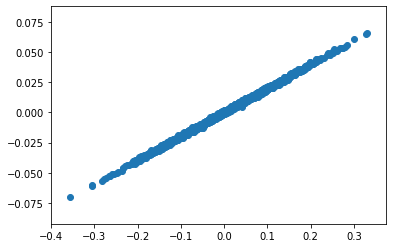

In [566]:
plt.scatter(y, p)